<a href="https://colab.research.google.com/github/sahug/time-series/blob/main/TSA%20-%20Basics%20-%20Introduction%20to%20Date%20and%20Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSA - Basics - Introduction to Date and Time**

**Import Datasets**

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 176MB/s]
 75% 9.00M/12.0M [00:00<00:00, 71.9MB/s]
100% 12.0M/12.0M [00:00<00:00, 89.2MB/s]


**Unzip**

In [ ]:
import zipfile
with zipfile.ZipFile("/content/stock-time-series-20050101-to-20171231.zip", "r") as zip:
  zip.extractall("/content/")

with zipfile.ZipFile("/content/historical-hourly-weather-data.zip", "r") as zip:
  zip.extractall("/content/")  

**Load Dataset**

In [ ]:
import pandas as pd

In [ ]:
google = pd.read_csv("/content/GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])
humidity = pd.read_csv("/content/humidity.csv", index_col='datetime', parse_dates=['datetime'])

In [ ]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [ ]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


**Data Preperation**

In [ ]:
humidity.isna().sum()

Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [ ]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method="ffill")
humidity.isna().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [ ]:
google.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

**Visualization**

In [ ]:
import matplotlib.pyplot as plt

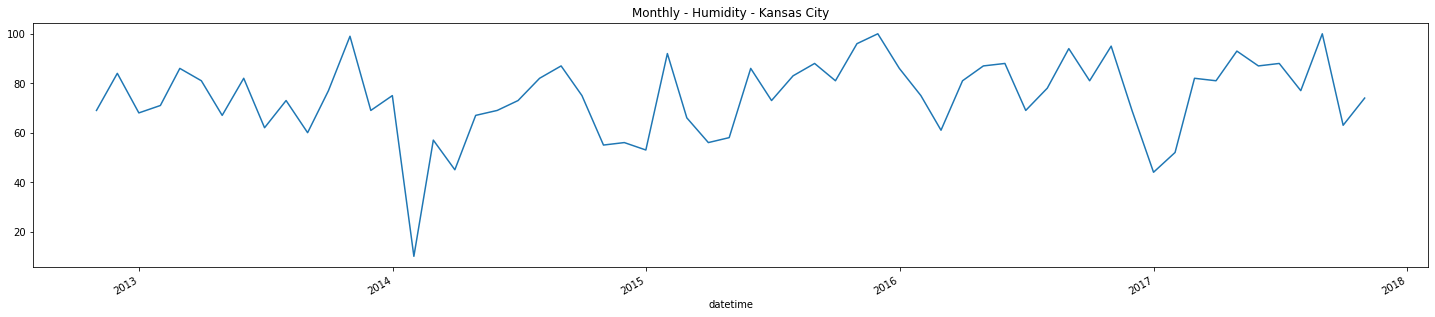

In [ ]:
# asfreq - Converts a time series to a specified frequency.
# M - Monthly
plt.figure(figsize=(25, 5))
humidity["Kansas City"].asfreq("M").plot()
plt.title("Monthly - Humidity - Kansas City")
plt.show()

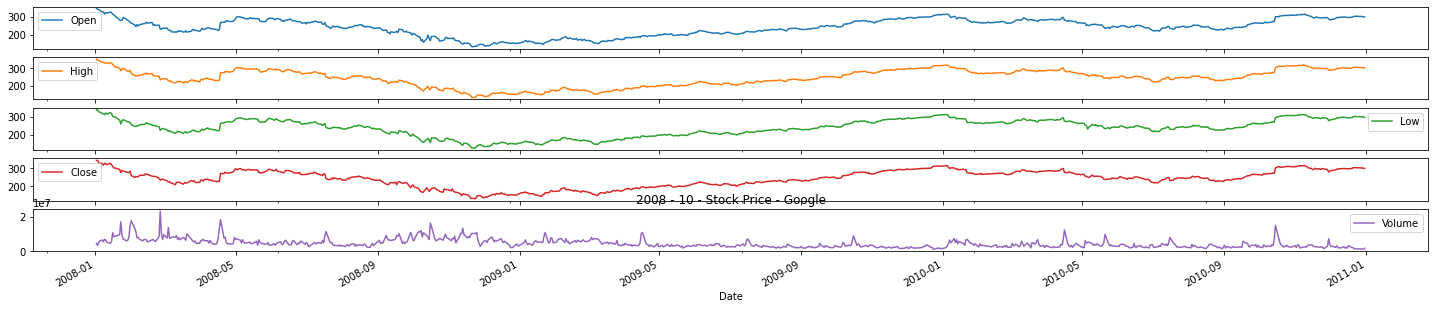

In [ ]:
google["2008":"2010"].plot(subplots=True, figsize=(25, 5))
plt.title("2008 - 10 - Stock Price - Google")
plt.show()

**Timestamps and Periods**
- Timestamps are used to represent a point in time. 
- Periods represent an interval in time. 
- They can also be converted to each other's form.



**Create Timestamp**

In [ ]:
from pandas._libs.tslibs import timestamps
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

**Create Period**

In [ ]:
period = pd.Period("2017-01-01")
period

Period('2017-01-01', 'D')

Check if the given timestamp exists in the given period

In [ ]:
period.start_time < timestamp < period.end_time

True

Convert timestamp to period

In [ ]:
n_period = timestamp.to_period(freq="H")
n_period

Period('2017-01-01 12:00', 'H')

Convert period to timestamp

In [ ]:
n_timestamp = period.to_timestamp(freq="H", how="start")
n_timestamp

Timestamp('2017-01-01 00:00:00')

**Date Range**

`date_range` is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

Create a `datetimeindex` with daily frequency

In [ ]:
dr = pd.date_range(start="1/1/18", end="1/9/18")
dr

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

Create a `datetimeindex` with monthly frequency

In [ ]:
dr = pd.date_range(start="1/1/18", end="1/9/19", freq="M")
dr

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

Create datetimeindex without specifying start date

In [ ]:
dr = pd.date_range(end="1/9/19", periods=8)
dr

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09'],
              dtype='datetime64[ns]', freq='D')

Create datetimeindex with start, end and period

In [ ]:
dr = pd.date_range(start="1/1/18", end="1/9/19", periods=3)
dr

DatetimeIndex(['2018-01-01 00:00:00', '2018-07-06 12:00:00',
               '2019-01-09 00:00:00'],
              dtype='datetime64[ns]', freq=None)

**to_datetime**

Used for convert arguments to datetime

In [ ]:
df = pd.DataFrame({"year": [2015, 2016], "month": [2, 3], "day": [4, 5]})
df

   year  month  day
0  2015      2    4
1  2016      3    5


In [ ]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [ ]:
df = pd.to_datetime("01-01-2017")
df

Timestamp('2017-01-01 00:00:00')

**Shifting and Lags**

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

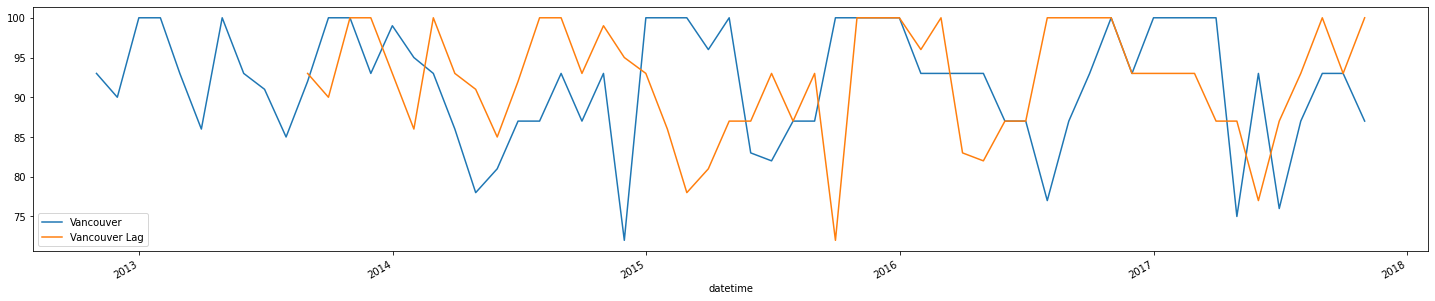

In [ ]:
plt.figure(figsize=(25, 5))
humidity["Vancouver"].asfreq("M").plot(legend=True)
shifted = humidity["Vancouver"].asfreq("M").shift(10).plot(legend=True)
shifted.legend(["Vancouver", "Vancouver Lag"])
plt.show()

**Resampling**

- **Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data
- **Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [ ]:
pressure = pd.read_csv("/content/pressure.csv", index_col="datetime", parse_dates=["datetime"])
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


First, we used `ffill` parameter which propagates last valid observation to fill gaps. Then we use `bfill` to propogate next valid observation to fill gaps.

In [ ]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 18:00:00,807.0,1024.0,1010.0,1030.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [ ]:
pressure.shape

(45251, 36)

**Downsampling**

Downsample from hourly to 3 day frequency, aggregated using mean.

In [ ]:
pressure = pressure.resample("3D").mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.000000,1013.000000,990.534483
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [ ]:
pressure.shape

(629, 36)

**Upsampling**

Upsample from 3 day frequency to daily frequency

In [ ]:
pressure = pressure.resample("D").pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.0,1013.0,990.534483
2012-10-02,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.0,1013.0,990.534483
2012-10-03,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.0,1013.0,990.534483
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [ ]:
pressure.shape

(1885, 36)